# Import Libraries

In [70]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Display properties
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from IPython.display import display, HTML

# Date
import datetime
from datetime import date, timedelta


# Maps
from math import pi

import pickle 


from sklearn.preprocessing import StandardScaler


from sklearn.cluster import KMeans

In [137]:
#Sklearn packages

# Import required packages for pre and post processing
from sklearn.preprocessing import normalize

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram


from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA



# Call pickle

In [4]:
with open('predictors_processed.pkl', 'rb') as f:
    predictors = pickle.load(f)

In [5]:
with open('fifa_processed.pkl', 'rb') as f:
    fifa = pickle.load(f)

In [14]:
fifa.head()

ID               Name  Age Nationality  Overall  Potential  \
0   0           L. Messi   31   Argentina       94         94   
1   1  Cristiano Ronaldo   33    Portugal       94         94   
2   2          Neymar Jr   26      Brazil       92         93   
3   3             De Gea   27       Spain       91         93   
4   4       K. De Bruyne   27     Belgium       91         92   

                  Club        Value      Wage  Special  Preferred Foot  \
0         FC Barcelona  110500000.0  565000.0     2202               0   
1             Juventus   77000000.0  405000.0     2228               1   
2  Paris Saint-Germain  118500000.0  290000.0     2143               1   
3    Manchester United   72000000.0  260000.0     1471               1   
4      Manchester City  102000000.0  355000.0     2281               1   

   International Reputation  Weak Foot  Skill Moves Body Type  Real Face  \
0                       5.0        4.0          4.0      Lean          1   
1                       5.0        4.0          5.0    Normal          1   
2                       5.0        5.0          5.0      Lean          1   
3                       4.0        3.0          1.0      Lean          1   
4                       4.0        5.0          4.0    Normal          1   

  Position  Jersey Number  Joined  Loaned From  Contract Valid Until  Height  \
0       RF           10.0    5297            0                     3     170   
1       ST            7.0     175            0                     4     188   
2       LW           10.0     516            0                     4     175   
3       GK            1.0    2741            0                     2     193   
4      RCM            7.0    1220            0                     5     180   

   Weight  LS  ST  RS  LW  LF  CF  RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  \
0     159  88  88  88  92  93  93  93  92   93   93   93  91   84  84   84   
1     183  91  91  91  89  90  90  90  89   88   88   88  88   81  81   81   
2     150  84  84  84  89  89  89  89  89   89   89   89  88   81  81   81   
3     168   0   0   0   0   0   0   0   0    0    0    0   0    0   0    0   
4     154  82  82  82  87  87  87  87  87   88   88   88  88   87  87   87   

   RM  LWB  LDM  CDM  RDM  RWB  LB  LCB  CB  RCB  RB  Crossing  Finishing  \
0  91   64   61   61   61   64  59   47  47   47  59      84.0       95.0   
1  88   65   61   61   61   65  61   53  53   53  61      84.0       94.0   
2  88   65   60   60   60   65  60   47  47   47  60      79.0       87.0   
3   0    0    0    0    0    0   0    0   0    0   0      17.0       13.0   
4  88   77   77   77   77   77  73   66  66   66  73      93.0       82.0   

   HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  \
0             70.0          90.0     86.0       97.0   93.0        94.0   
1             89.0          81.0     87.0       88.0   81.0        76.0   
2             62.0          84.0     84.0       96.0   88.0        87.0   
3             21.0          50.0     13.0       18.0   21.0        19.0   
4             55.0          92.0     82.0       86.0   85.0        83.0   

   LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  \
0         87.0         96.0          91.0         86.0     91.0       95.0   
1         77.0         94.0          89.0         91.0     87.0       96.0   
2         78.0         95.0          94.0         90.0     96.0       94.0   
3         51.0         42.0          57.0         58.0     60.0       90.0   
4         91.0         91.0          78.0         76.0     79.0       91.0   

   Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  \
0     95.0       85.0     68.0     72.0      59.0       94.0        48.0   
1     70.0       95.0     95.0     88.0      79.0       93.0        63.0   
2     84.0       80.0     61.0     81.0      49.0       82.0        56.0   
3     43.0       31.0     67.0     43.0      64.0       12.0        38.0 

In [10]:
predictors.head()

Age  Overall  Potential  Special  Preferred Foot  International Reputation  \
0   31       94         94     2202               0                       5.0   
1   33       94         94     2228               1                       5.0   
2   26       92         93     2143               1                       5.0   
3   27       91         93     1471               1                       4.0   
4   27       91         92     2281               1                       4.0   

   Weak Foot  Skill Moves  Real Face  Jersey Number  Joined  Loaned From  \
0        4.0          4.0          1           10.0    5297            0   
1        4.0          5.0          1            7.0     175            0   
2        5.0          5.0          1           10.0     516            0   
3        3.0          1.0          1            1.0    2741            0   
4        5.0          4.0          1            7.0    1220            0   

   Contract Valid Until  Height  Weight  LS  ST  RS  LW  LF  CF  RF  RW  LAM  \
0                     3     170     159  88  88  88  92  93  93  93  92   93   
1                     4     188     183  91  91  91  89  90  90  90  89   88   
2                     4     175     150  84  84  84  89  89  89  89  89   89   
3                     2     193     168   0   0   0   0   0   0   0   0    0   
4                     5     180     154  82  82  82  87  87  87  87  87   88   

   CAM  RAM  LM  LCM  CM  RCM  RM  LWB  LDM  CDM  RDM  RWB  LB  LCB  CB  RCB  \
0   93   93  91   84  84   84  91   64   61   61   61   64  59   47  47   47   
1   88   88  88   81  81   81  88   65   61   61   61   65  61   53  53   53   
2   89   89  88   81  81   81  88   65   60   60   60   65  60   47  47   47   
3    0    0   0    0   0    0   0    0    0    0    0    0   0    0   0    0   
4   88   88  88   87  87   87  88   77   77   77   77   77  73   66  66   66   

   RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0  59      84.0       95.0             70.0          90.0     86.0       97.0   
1  61      84.0       94.0             89.0          81.0     87.0       88.0   
2  60      79.0       87.0             62.0          84.0     84.0       96.0   
3   0      17.0       13.0             21.0          50.0     13.0       18.0   
4  73      93.0       82.0             55.0          92.0     82.0       86.0   

   Curve  FKAccuracy  LongPassing  ...  Club_Reputation  Position_Potential  \
0   93.0        94.0         87.0  ...         2.242424                   2   
1   81.0        76.0         77.0  ...         2.520000                   3   
2   88.0        87.0         78.0  ...         2.233333                   3   
3   21.0        19.0         51.0  ...         2.090909                   0   
4   85.0        83.0         91.0  ...         2.090909                   3   

   Attacking  Skill  Movement  Power  Mentality  Defending  GoalKeeping  \
0       85.0   93.4      91.6   75.6  71.500000  29.000000         10.8   
1       87.0   83.2      86.6   90.0  74.833333  27.333333         11.6   
2       79.2   88.8      91.6   70.6  73.833333  28.000000         11.8   
3       22.8   30.2      61.6   43.4  42.666667  16.333333         88.8   
4       80.8   87.2      80.2   82.0  80.833333  59.000000         11.2   

   Potential_Difference  Body Type  Attack_WR  Defense_WR  Position_CAM  \
0                     0          1          2           2             0   
1                     0          2          3           1             0   
2                     1          1          3           2             0   
3                     2          1          2           2             0   
4                     1          2          3           3             0   

   Position_CB  Position_CDM  Position_CF  Position_CM  Position_GK  \
0            0             0            0            0            0   
1            0             0            0            0            0   
2            0      

In [13]:
#Drop unimportant features for recommendation
predictors = predictors.drop(['Jersey Number','Loaned From', 'Joined','Contract Valid Until'], axis = 1)

In [15]:
predictors.head()

Age  Overall  Potential  Special  Preferred Foot  International Reputation  \
0   31       94         94     2202               0                       5.0   
1   33       94         94     2228               1                       5.0   
2   26       92         93     2143               1                       5.0   
3   27       91         93     1471               1                       4.0   
4   27       91         92     2281               1                       4.0   

   Weak Foot  Skill Moves  Real Face  Height  Weight  LS  ST  RS  LW  LF  CF  \
0        4.0          4.0          1     170     159  88  88  88  92  93  93   
1        4.0          5.0          1     188     183  91  91  91  89  90  90   
2        5.0          5.0          1     175     150  84  84  84  89  89  89   
3        3.0          1.0          1     193     168   0   0   0   0   0   0   
4        5.0          4.0          1     180     154  82  82  82  87  87  87   

   RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  RM  LWB  LDM  CDM  RDM  RWB  LB  \
0  93  92   93   93   93  91   84  84   84  91   64   61   61   61   64  59   
1  90  89   88   88   88  88   81  81   81  88   65   61   61   61   65  61   
2  89  89   89   89   89  88   81  81   81  88   65   60   60   60   65  60   
3   0   0    0    0    0   0    0   0    0   0    0    0    0    0    0   0   
4  87  87   88   88   88  88   87  87   87  88   77   77   77   77   77  73   

   LCB  CB  RCB  RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
0   47  47   47  59      84.0       95.0             70.0          90.0   
1   53  53   53  61      84.0       94.0             89.0          81.0   
2   47  47   47  60      79.0       87.0             62.0          84.0   
3    0   0    0   0      17.0       13.0             21.0          50.0   
4   66  66   66  73      93.0       82.0             55.0          92.0   

   Volleys  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  \
0     86.0       97.0   93.0        94.0         87.0         96.0   
1     87.0       88.0   81.0        76.0         77.0         94.0   
2     84.0       96.0   88.0        87.0         78.0         95.0   
3     13.0       18.0   21.0        19.0         51.0         42.0   
4     82.0       86.0   85.0        83.0         91.0         91.0   

   Acceleration  SprintSpeed  Agility  ...  Club_Reputation  \
0          91.0         86.0     91.0  ...         2.242424   
1          89.0         91.0     87.0  ...         2.520000   
2          94.0         90.0     96.0  ...         2.233333   
3          57.0         58.0     60.0  ...         2.090909   
4          78.0         76.0     79.0  ...         2.090909   

   Position_Potential  Attacking  Skill  Movement  Power  Mentality  \
0                   2       85.0   93.4      91.6   75.6  71.500000   
1                   3       87.0   83.2      86.6   90.0  74.833333   
2                   3       79.2   88.8      91.6   70.6  73.833333   
3                   0       22.8   30.2      61.6   43.4  42.666667   
4                   3       80.8   87.2      80.2   82.0  80.833333   

   Defending  GoalKeeping  Potential_Difference  Body Type  Attack_WR  \
0  29.000000         10.8                     0          1          2   
1  27.333333         11.6                     0          2          3   
2  28.000000         11.8                     1          1          3   
3  16.333333         88.8                     2          1          2   
4  59.000000         11.2                     1          2          3   

   Defense_WR  Position_CAM  Position_CB  Position_CDM  Position_CF  \
0           2             0            0             0            0   
1           1             0            0             0            0   
2           2             0            0             0            0   
3           2             0            0             0            0   
4           3             0            0             0            0   

   Position_CM  

In [24]:
len(predictors.columns)

121

In [35]:
numeric_cols=['Age', 'Overall','Potential','Special','International Reputation', 'Weak Foot', 'Skill Moves',
               'Height', 'Weight','LS','ST','RS',  'LW',  'LF',  'CF',  'RF',  'RW',  'LAM',  'CAM',  'RAM', 
               'LM',  'LCM',  'CM',  'RCM',  'RM',  'LWB',  'LDM',  'CDM',  'RDM',  'RWB',  'LB',  'LCB',  'CB',
               'RCB',  'RB',  'Crossing',  'Finishing',  'HeadingAccuracy',  'ShortPassing',  'Volleys', 
               'Dribbling',  'Curve',  'FKAccuracy',  'LongPassing',  'BallControl',  'Acceleration',  
               'SprintSpeed',  'Agility',  'Reactions',  'Balance',  'ShotPower',  'Jumping',  'Stamina',  
               'Strength',  'LongShots',  'Aggression',  'Interceptions',  'Positioning',  'Vision',  
               'Penalties',  'Composure',  'Marking',  'StandingTackle',  'SlidingTackle',  'GKDiving',  
               'GKHandling',  'GKKicking',  'GKPositioning',  'GKReflexes',  'Club_Reputation',  
               'Position_Potential',  'Attacking',  'Skill',  'Movement',  'Power',  'Mentality',  
               'Defending',  'GoalKeeping',  'Potential_Difference',  'Attack_WR',  'Defense_WR']

non_numeric_cols=['Position_CAM',  'Position_CB',  'Position_CDM',  'Position_CF',  'Position_CM',  
                   'Position_GK',  'Position_LAM',  'Position_LB',  'Position_LCB',  'Position_LCM',  
                   'Position_LDM',  'Position_LF',  'Position_LM',  'Position_LS',  'Position_LW',  
                   'Position_LWB',  'Position_RAM',  'Position_RB',  'Position_RCB',  'Position_RCM',  
                   'Position_RDM',  'Position_RF',  'Position_RM',  'Position_RS',  'Position_RW',  
                   'Position_RWB',  'Position_ST',  'Continent_Africa',  'Continent_Asia',  'Continent_Europe',
                   'Continent_North America',  'Continent_Oceania',  'Continent_South America',  
                   'Position_Group_Defender',  'Position_Group_Forward',  'Position_Group_GoalKeeper', 
                   'Position_Group_Midfielder', 'Preferred Foot','Real Face','Body Type']
len(numeric_cols) + len(non_numeric_cols)

121

In [38]:
scl = StandardScaler()

#Scale the numeric columns
predictors_num = pd.DataFrame(scl.fit_transform(predictors[numeric_cols]), columns=numeric_cols)

#Merge scaled numerics with the dummy/ordinal columns
predictors_scaled = pd.concat([predictors_num,predictors[non_numeric_cols]], axis=1)



In [41]:
predictors_scaled.head()

Age   Overall  Potential   Special  International Reputation  \
0  1.258441  4.013364   3.697415  2.213984                  9.864420   
1  1.686666  4.013364   3.697415  2.309273                  9.864420   
2  0.187878  3.724114   3.534396  1.997752                  9.864420   
3  0.401990  3.579489   3.534396 -0.465097                  7.326477   
4  0.401990  3.579489   3.371377  2.503515                  7.326477   

   Weak Foot  Skill Moves    Height    Weight        LS        ST        RS  \
0   1.593944     2.167171 -1.670713 -0.447583  1.818665  1.818665  1.818665   
1   1.593944     3.489672  1.019186  1.091577  1.967451  1.967451  1.967451   
2   3.108090     3.489672 -0.923519 -1.024769  1.620283  1.620283  1.620283   
3   0.079797    -1.800331  1.766380  0.129602 -2.545731 -2.545731 -2.545731   
4   3.108090     2.167171 -0.176325 -0.768242  1.521092  1.521092  1.521092   

         LW        LF        CF        RF        RW       LAM       CAM  \
0  1.901392  1.973099  1.973099  1.973099  1.901392  1.957564  1.957564   
1  1.757292  1.828258  1.828258  1.828258  1.757292  1.716682  1.716682   
2  1.757292  1.779978  1.779978  1.779978  1.757292  1.764859  1.764859   
3 -2.517663 -2.516977 -2.516977 -2.516977 -2.517663 -2.522831 -2.522831   
4  1.661226  1.683417  1.683417  1.683417  1.661226  1.716682  1.716682   

        RAM        LM       LCM        CM       RCM        RM       LWB  \
0  1.957564  1.828702  1.603458  1.603458  1.603458  1.828702  0.646400   
1  1.716682  1.684202  1.454577  1.454577  1.454577  1.684202  0.696360   
2  1.764859  1.684202  1.454577  1.454577  1.454577  1.684202  0.696360   
3 -2.522831 -2.554472 -2.565223 -2.565223 -2.565223 -2.554472 -2.551047   
4  1.716682  1.684202  1.752340  1.752340  1.752340  1.684202  1.295881   

        LDM       CDM       RDM       RWB        LB       LCB        CB  \
0  0.519988  0.519988  0.519988  0.646400  0.427328 -0.114632 -0.114632   
1  0.519988  0.519988  0.519988  0.696360  0.527106  0.174842  0.174842   
2  0.470696  0.470696  0.470696  0.696360  0.477217 -0.114632 -0.114632   
3 -2.486788 -2.486788 -2.486788 -2.551047 -2.516127 -2.382176 -2.382176   
4  1.308650  1.308650  1.308650  1.295881  1.125774  0.802035  0.802035   

        RCB        RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
0 -0.114632  0.427328  1.865922   2.532567         1.018552      2.130287   
1  0.174842  0.527106  1.865922   2.481351         2.111799      1.518005   
2 -0.114632  0.477217  1.593650   2.122842         0.558238      1.722099   
3 -2.382176 -2.516127 -1.782517  -1.667116        -1.800873     -0.590969   
4  0.802035  1.125774  2.356010   1.866764         0.155463      2.266350   

    Volleys  Dribbling     Curve  FKAccuracy  LongPassing  BallControl  \
0  2.435355   2.201445  2.491426    2.925736     2.237037     2.255198   
1  2.491871   1.725503  1.839066    1.895887     1.584613     2.135338   
2  2.322322   2.148563  2.219609    2.525239     1.649855     2.195268   
3 -1.690356  -1.976272 -1.422733   -1.365303    -0.111691    -0.981022   
4  2.209288   1.619738  2.056519    2.296384     2.498007     1.955548   

   Acceleration  SprintSpeed   Agility  Reactions   Balance  ...  Attacking  \
0      1.767621     1.452129  1.862187   3.680643  2.195382  ...   2.367037   
1      1.633639     1.793436  1.591288   3.791628  0.426820  ...   2.501665   
2      1.968594     1.725175  2.200811   3.569658  1.417214  ...   1.976617   
3     -0.510075    -0.459193 -0.237281   3.125717 -1.483228  ...  -1.819883   
4      0.896737     0.769514  1.049490   3.236703  0.922017  ...   2.084319   

      Skill  Movement     Power  Mentality  Defending  GoalKeeping  \
0  2.652691  2.491225  1.477531   1.581089  -0.874941    -0.333393   
1  2.010038  2.044295  2.777910   1.853981  -0.956497    -0.286336   
2  2.362867  2.491225  1.026010   1.772114  -0.923875    -0.274572   
3 -1.329238 -0.190353 -1.430261  -0.779428  -1.494763     4.254638   
4  2.262059  1

# Similar Player Recommendation

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

scaled = StandardScaler()
X = scaled.fit_transform(predictors_scaled)
recommendations = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(X)

#Pass the player name from the dataset to the function and get 5 similar players as output
player_indices = recommendations.kneighbors(X)[1]

def get_index(x):
    return fifa[fifa['Name']==x].index.tolist()[0]

def recommend_me(player):
    index = get_index(player)
    recommend_list = []
    for i in player_indices[index][1:]:
            recommend_list.append(fifa.iloc[i]['Name'])
    recommend_list.insert(0, player)
    return recommend_list


In [86]:
player = input("Enter the player you are looking for: \n")

recommendation = recommend_me(player)

print("Here are 5 players similar to " +  player + ': \n \n' + str(recommendation[1:]))

Enter the player you are looking for: 
M. Neuer
Here are 5 players similar to M. Neuer: 
 
['De Gea', 'G. Buffon', 'M. ter Stegen', 'T. Courtois', 'P. Čech']


In [87]:
rador_variables = ['Age','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys',
                 'Dribbling','Curve','FKAccuracy','LongPassing','BallControl',
                 'Acceleration','SprintSpeed','Agility','Reactions','Balance',
                 'ShotPower','Jumping','Stamina','Strength','LongShots',
                 'Aggression','Interceptions','Positioning','Vision','Penalties',
                 'Composure','Marking','StandingTackle','SlidingTackle',
                 'GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']

In [59]:
def RadorChart(graph, abilities, player_name):
    len1 = graph.shape[0]
    len2 = graph.shape[1]
    temp = graph.values.reshape((len1, len2))
    
    tmp = pd.DataFrame(temp, columns = abilities)
    Attributes =list(tmp)
    AttNo = len(Attributes)
    
    plt.figure(figsize=(10,10))
    ax = plt.subplot(111, polar=True)
    
    colors = ['green', 'blue', 'red', 'black', 'gold', 'orange', 'lightskyblue', 'pink']
    
    for i in range(len1):
        values = tmp.iloc[i].tolist() #
        values += values [:1]
    
        angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
        angles += angles [:1]
        
        plt.xticks(angles[:-1],Attributes)
        ax.plot(angles, values, color = colors[i])
        ax.fill(angles, values, colors[i], alpha=0.1)
        plt.figtext(0.8, 0.18-0.022*i, player_name[i], color = colors[i], fontsize=12)
    
    plt.show()

In [88]:
standard_player = predictors[rador_variables][fifa.Name.isin(recommendation)]
standard_player = standard_player.set_index(pd.Index(fifa.Name[standard_player.index].values))

In [90]:
standard_player.head(10)

Age  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
De Gea          27      17.0       13.0             21.0          50.0   
M. ter Stegen   26      15.0       14.0             11.0          36.0   
T. Courtois     26      14.0       14.0             13.0          33.0   
M. Neuer        32      15.0       13.0             25.0          55.0   
G. Buffon       40      13.0       15.0             13.0          37.0   
P. Čech         36      19.0       12.0             19.0          35.0   

               Volleys  Dribbling  Curve  FKAccuracy  LongPassing  \
De Gea            13.0       18.0   21.0        19.0         51.0   
M. ter Stegen     14.0       17.0   18.0        12.0         42.0   
T. Courtois       12.0       13.0   19.0        20.0         35.0   
M. Neuer          11.0       30.0   14.0        11.0         59.0   
G. Buffon         17.0       26.0   20.0        13.0         35.0   
P. Čech           17.0       12.0   13.0        19.0         33.0   

               BallControl  Acceleration  SprintSpeed  Agility  Reactions  \
De Gea                42.0          57.0         58.0     60.0       90.0   
M. ter Stegen         18.0          38.0         50.0     37.0       85.0   
T. Courtois           23.0          46.0         52.0     61.0       84.0   
M. Neuer              48.0          54.0         60.0     51.0       84.0   
G. Buffon             28.0          49.0         43.0     55.0       79.0   
P. Čech               22.0          35.0         38.0     46.0       77.0   

               Balance  ShotPower  Jumping  Stamina  Strength  LongShots  \
De Gea            43.0       31.0     67.0     43.0      64.0       12.0   
M. ter Stegen     43.0       22.0     79.0     35.0      79.0       10.0   
T. Courtois       45.0       36.0     68.0     38.0      70.0       17.0   
M. Neuer          35.0       25.0     77.0     43.0      80.0       16.0   
G. Buffon         49.0       39.0     75.0     39.0      69.0       13.0   
P. Čech           34.0       21.0     50.0     32.0      63.0       11.0   

               Aggression  Interceptions  Positioning  Vision  Penalties  \
De Gea               38.0           30.0         12.0    68.0       40.0   
M. ter Stegen        43.0           22.0         11.0    69.0       25.0   
T. Courtois          23.0           15.0         13.0    44.0       27.0   
M. Neuer             29.0           30.0         12.0    70.0       47.0   
G. Buffon            38.0           28.0         12.0    50.0       22.0   
P. Čech              17.0           23.0         13.0    53.0       23.0   

               Composure  Marking  StandingTackle  SlidingTackle  GKDiving  \
De Gea              68.0     15.0            21.0           13.0      90.0   
M. ter Stegen       69.0     25.0            13.0           10.0      87.0   
T. Courtois         66.0     20.0            18.0           16.0      85.0   
M. Neuer            70.0     17.0            10.0           11.0      90.0   
G. Buffon           70.0     13.0            11.0           11.0      88.0   
P. Čech             63.0     12.0            13.0           12.0      78.0   

               GKHandling  GKKicking  GKPositioning  GKReflexes  
De Gea               85.0       87.0           88.0        94.0  
M. ter Stegen        85.0       88.0           85.0        90.0  
T. Courtois          91.0       72.0           86.0        88.0  
M. Neuer             86.0       91.0           87.0        87.0  
G. Buffon            87.0       74.0           90.0        83.0  
P. Čech              82.0       70.0           83.0        79.0

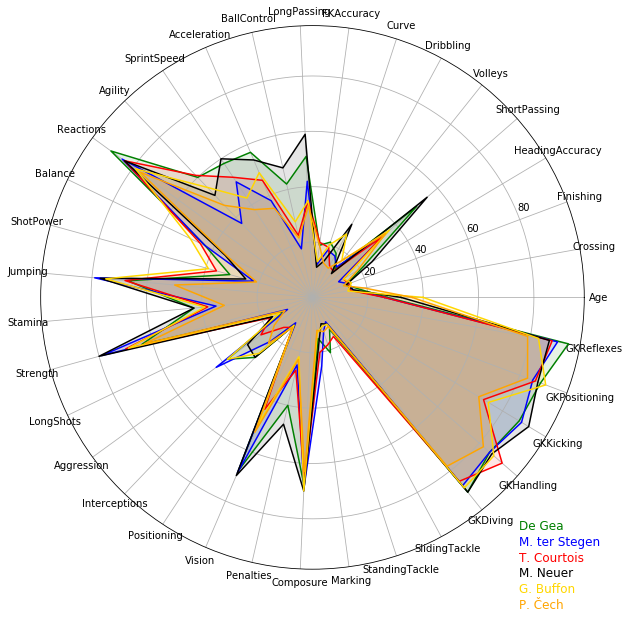

In [89]:
RadorChart(graph= standard_player, 
           abilities = rador_variables, 
           player_name = pd.Series(standard_player.index).values)

# Function for filtering for specific Overall & Position

In [134]:
def filter_players(position, ovr_min = 0, ovr_max= 100):
    if str(position) == 'RF':
        indices = list(fifa[(fifa['Position'].isin(['RF','RS'])) & (fifa['Overall'] <= ovr_max) & 
                        (fifa['Overall'] >= ovr_min)].index.values)
    elif str(position) == 'LF':
        indices = list(fifa[(fifa['Position'].isin(['LF','LS'])) & (fifa['Overall'] <= ovr_max) & 
                        (fifa['Overall'] >= ovr_min)].index.values)
    elif str(position) == 'LAM':
        indices = list(fifa[(fifa['Position'].isin(['LAM','LM'])) & (fifa['Overall'] <= ovr_max) & 
                        (fifa['Overall'] >= ovr_min)].index.values)
    elif str(position) == 'RAM':
        indices = list(fifa[(fifa['Position'].isin(['RAM','RM'])) & (fifa['Overall'] <= ovr_max) & 
                        (fifa['Overall'] >= ovr_min)].index.values)
    else:
        indices = list(fifa[(fifa['Position'] == position) & (fifa['Overall'] <= ovr_max) & 
                        (fifa['Overall'] >= ovr_min)].index.values)

    filtered_df = predictors_scaled.iloc[indices,:]
    return filtered_df
    

In [135]:
posit = input("Enter the position looking for: \n")
over_min = input("What is the min overall?: \n")
over_max = input("What is the max overall?: \n")

filtered_players = filter_players(str(posit), int(over_min), int(over_max))

print("Here are the filtered players based on your criteries: ")
filtered_players

Enter the position looking for: 
LS
What is the min overall?: 
80
What is the max overall?: 
81
Here are the filtered players based on your criteries: 


Age   Overall  Potential   Special  International Reputation  \
329 -0.668573  2.133236   2.393263  1.543297                  4.788534   
330  1.044328  2.133236   1.578167  1.781519                 -0.287351   
345 -0.026235  2.133236   2.067225  1.169472                 -0.287351   
346  1.258441  2.133236   1.578167  1.048529                  4.788534   
411  2.329004  2.133236   1.578167  1.279421                  2.250592   
441 -0.668573  1.988611   2.230244  1.535968                 -0.287351   
461  1.044328  1.988611   1.415148  1.495653                 -0.287351   
540  1.472553  1.988611   1.415148  0.762662                  4.788534   
553  1.900779  1.988611   1.415148  1.052194                  4.788534   

     Weak Foot  Skill Moves    Height    Weight        LS        ST        RS  \
329   1.593944     2.167171 -0.923519 -0.768242  1.223520  1.223520  1.223520   
330   1.593944     2.167171 -0.176325 -0.768242  1.223520  1.223520  1.223520   
345   1.593944     0.844670 -1.670713 -0.896505  1.372306  1.372306  1.372306   
346  -1.434349     0.844670 -0.176325  0.257865  1.372306  1.372306  1.372306   
411   0.079797     2.167171 -0.475202 -0.062793  1.173925  1.173925  1.173925   
441   1.593944     0.844670 -0.176325  0.257865  1.322711  1.322711  1.322711   
461   1.593944     2.167171  0.271992 -0.575847  1.322711  1.322711  1.322711   
540   1.593944     0.844670  1.019186  1.925289  1.273115  1.273115  1.273115   
553   1.593944     0.844670  0.570870  0.514392  1.273115  1.273115  1.273115   

           LW        LF        CF        RF        RW       LAM       CAM  \
329  1.324993  1.297174  1.297174  1.297174  1.324993  1.234920  1.234920   
330  1.373027  1.297174  1.297174  1.297174  1.373027  1.283096  1.283096   
345  1.084827  1.200613  1.200613  1.200613  1.084827  0.994038  0.994038   
346  1.084827  1.248893  1.248893  1.248893  1.084827  1.042214  1.042214   
411  1.324993  1.297174  1.297174  1.297174  1.324993  1.331272  1.331272   
441  1.180894  1.200613  1.200613  1.200613  1.180894  1.090391  1.090391   
461  1.228927  1.297174  1.297174  1.297174  1.228927  1.283096  1.283096   
540  0.892694  1.055772  1.055772  1.055772  0.892694  0.849509  0.849509   
553  1.132860  1.200613  1.200613  1.200613  1.132860  1.138567  1.138567   

          RAM        LM       LCM        CM       RCM        RM       LWB  \
329  1.234920  1.250702  1.007932  1.007932  1.007932  1.250702  0.646400   
330  1.283096  1.298868  1.156814  1.156814  1.156814  1.298868  0.946161   
345  0.994038  0.961701  0.610915  0.610915  0.610915  0.961701  0.046879   
346  1.042214  1.009868  0.710169  0.710169  0.710169  1.009868  0.096839   
411  1.331272  1.250702  1.206441  1.206441  1.206441  1.250702  0.496520   
441  1.090391  1.106201  0.908678  0.908678  0.908678  1.106201  0.696360   
461  1.283096  1.106201  1.107187  1.107187  1.107187  1.106201  0.396599   
540  0.849509  0.769034  0.561288  0.561288  0.561288  0.769034 -0.003081   
553  1.138567  1.009868  0.759796  0.759796  0.759796  1.009868  0.096839   

          LDM       CDM       RDM       RWB        LB       LCB        CB  \
329  0.421405  0.421405  0.421405  0.646400  0.477217  0.126596  0.126596   
330  0.766445  0.766445  0.766445  0.946161  0.826440  0.512561  0.512561   
345 -0.120800 -0.120800 -0.120800  0.046879 -0.071563 -0.259369 -0.259369   
346  0.076365  0.076365  0.076365  0.096839 -0.021674 -0.114632 -0.114632   
411  0.470696  0.470696  0.470696  0.496520  0.327550  0.030105  0.030105   
441  0.569279  0.569279  0.569279  0.696360  0.626884  0.512561  0.512561   
461  0.470696  0.470696  0.470696  0.396599  0.277661  0.126596  0.126596   
540  0.027074  0.027074  0.027074 -0.003081 -0.071563  0.078350  0.078350   
553  0.027074  0.027074  0.027074  0.096839 -0.021674 -0.114632 -0.114632   

          RCB        RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
329  0.126596  0.477217  1.375833   1.610685         0.443159     

# Clustering

In [139]:
scaled = StandardScaler()
X = scaled.fit_transform(predictors_scaled)
recommendations_100 = NearestNeighbors(n_neighbors=100, algorithm='ball_tree').fit(X)

#Pass the player name from the dataset to the function and get 5 similar players as output
player_indices_100 = recommendations_100.kneighbors(X)[1]


In [172]:
fifa.Position_Group[fifa['Name']=='L. Messi'][0]

'Forward'

In [186]:
indices = list(fifa[(fifa.Position_Group == 'Forward')|(fifa.Position_Group == 'Midfielder')].index.values)

In [195]:
predictors_scaled.iloc[indices,:]

Age   Overall  Potential   Special  International Reputation  \
0      1.258441  4.013364   3.697415  2.213984                  9.864420   
1      1.686666  4.013364   3.697415  2.309273                  9.864420   
2      0.187878  3.724114   3.534396  1.997752                  9.864420   
4      0.401990  3.579489   3.371377  2.503515                  7.326477   
5      0.401990  3.579489   3.208358  1.994087                  7.326477   
6      1.472553  3.579489   3.208358  2.499850                  7.326477   
7      1.258441  3.579489   3.208358  2.741737                  9.864420   
10     0.830215  3.434863   3.045339  2.030736                  7.326477   
11     0.616103  3.434863   3.045339  2.170004                  7.326477   
13     1.472553  3.434863   3.045339  1.895133                  7.326477   
14     0.401990  3.290238   3.045339  2.166340                  4.788534   
15    -0.240348  3.290238   3.697415  1.810839                  4.788534   
16    -0.240348  3.290238   3.208358  2.078381                  4.788534   
17     0.401990  3.290238   3.045339  2.375242                  7.326477   
20     0.830215  3.290238   2.882320  1.711885                  7.326477   
21     1.258441  3.290238   2.882320  2.063721                  7.326477   
23     1.044328  3.290238   2.882320  1.865813                  7.326477   
25    -1.310911  3.145613   3.860435  1.906128                  4.788534   
26     0.187878  3.145613   2.882320  2.008747                  4.788534   
27     0.187878  3.145613   3.045339  2.096705                  4.788534   
28     0.187878  3.145613   2.882320  2.100370                  7.326477   
29     0.401990  3.145613   2.719301  1.535968                  4.788534   
30     0.187878  3.145613   3.208358  1.975762                  4.788534   
31     0.187878  3.145613   3.208358  1.902463                  4.788534   
32     0.187878  3.145613   2.882320  2.115030                  4.788534   
33     0.830215  3.145613   2.719301  1.726545                  4.788534   
36     0.616103  3.145613   2.719301  2.496185                  7.326477   
38     1.044328  3.145613   2.719301  1.345390                  7.326477   
43    -0.026235  3.000988   3.045339  1.253766                  4.788534   
45    -0.026235  3.000988   3.208358  2.378907                  7.326477   
47    -0.026235  3.000988   2.882320  1.587277                  4.788534   
48     0.616103  3.000988   2.556282  1.506648                  4.788534   
50     1.258441  3.000988   2.556282  1.631256                  4.788534   
52     1.044328  3.000988   2.556282  2.162675                  4.788534   
53     1.044328  3.000988   2.556282  2.148015                  7.326477   
55    -0.668573  2.856362   3.371377  1.803509                  2.250592   
56    -0.454460  2.856362   3.208358  1.616596                  2.250592   
58     0.187878  2.856362   2.556282  1.876808                  4.788534   
60    -0.454460  2.856362   2.882320  1.605602                  4.788534   
61     0.187878  2.856362   2.556282  2.159010                  4.788534   
63    -0.026235  2.856362   2.882320  2.019741                  4.788534   
65     0.401990  2.856362   2.393263  1.880473                  4.788534   
66     0.616103  2.856362   2.393263  1.829164                  7.326477   
67     0.401990  2.856362   2.393263  2.170004                  4.788534   
68     0.830215  2.856362   2.393263  2.104035                  7.326477   
72     0.616103  2.856362   2.393263  2.140685                  4.788534   
74     0.830215  2.856362   2.393263  1.147482                  7.326477   
75     1.686666  2.856362   2.393263  2.144350                  4.788534   
76     1.900779  2.856362   2.393263  1.686231                  7.326477   
78    -0.454460  2.711737   3.045339  2.228644                  2.250592   
...         ...       ...        ...       ...                       ...   
18082 -1.739136 -2.494771  -0.704100 -1.286047              

In [196]:
def recommended_k_players_df(player, k_players = 100):
    #Find players' position group
    pos_group = fifa.Position_Group[fifa['Name']==player][0]
    
    #Filter df for that position group
    if pos_group == 'Forward':
        indices = list(fifa[(fifa.Position_Group == 'Forward')|(fifa.Position_Group == 'Midfielder')].index.values)
    elif pos_group == 'Midfielder':
        indices = list(fifa[(fifa.Position_Group == 'Forward')|(fifa.Position_Group == 'Midfielder')].index.values)
    elif pos_group == 'Defender':
        indices = list(fifa[fifa.Position_Group == 'Defender'].index.values)
    elif pos_group == 'GoalKeeper':
        indices = list(fifa[fifa.Position_Group == 'GoalKeeper'].index.values)
    
    predictors_scaled_subset = predictors_scaled.iloc[indices,:]
    
    #Fit KNN for the k_players within that position group
    recommendations_100 = NearestNeighbors(n_neighbors=k_players, algorithm='ball_tree').fit(predictors_scaled_subset)

    #Pass the player name from the dataset to the function and get 5 similar players as output
    player_indices_100 = recommendations_100.kneighbors(X)[1]
    
    #Get player index
    #fifa_subset = fifa.iloc[indices,:].reset_index()
    index = fifa[fifa['Name']==player].index.tolist()[0]
    
    #Create recommended name list
    recommend_list = []
    for i in player_indices_100[index][1:]:
            recommend_list.append(fifa.iloc[i]['Name'])
    recommend_list.insert(0, player)
    
    #Get filtered df of recommended players
    recommended_df = predictors_scaled_subset.iloc[list(player_indices_100[index][1:]),:]
    
    return recommend_list, display(recommended_df)


In [197]:
recommended_k_players_df('L. Messi', k_players=200)

Age   Overall  Potential   Special  International Reputation  \
50    1.258441  3.000988   2.556282  1.631256                  4.788534   
2     0.187878  3.724114   3.534396  1.997752                  9.864420   
5     0.401990  3.579489   3.208358  1.994087                  7.326477   
23    1.044328  3.290238   2.882320  1.865813                  7.326477   
68    0.830215  2.856362   2.393263  2.104035                  7.326477   
28    0.187878  3.145613   2.882320  2.100370                  7.326477   
15   -0.240348  3.290238   3.697415  1.810839                  4.788534   
17    0.401990  3.290238   3.045339  2.375242                  7.326477   
93    0.830215  2.711737   2.230244  2.104035                  7.326477   
84    0.401990  2.711737   2.230244  1.587277                  4.788534   
1     1.686666  4.013364   3.697415  2.309273                  9.864420   
13    1.472553  3.434863   3.045339  1.895133                  7.326477   
138   1.044328  2.567112   2.067225  1.887803                  7.326477   
36    0.616103  3.145613   2.719301  2.496185                  7.326477   
890   1.686666  1.699361   1.089110  1.649581                  4.788534   
10    0.830215  3.434863   3.045339  2.030736                  7.326477   
154   1.900779  2.567112   2.067225  1.634921                  7.326477   
26    0.187878  3.145613   2.882320  2.008747                  4.788534   
32    0.187878  3.145613   2.882320  2.115030                  4.788534   
74    0.830215  2.856362   2.393263  1.147482                  7.326477   
65    0.401990  2.856362   2.393263  1.880473                  4.788534   
105   1.044328  2.711737   2.230244  1.473663                  7.326477   
38    1.044328  3.145613   2.719301  1.345390                  7.326477   
29    0.401990  3.145613   2.719301  1.535968                  4.788534   
221   2.114891  2.422487   1.904205  1.213452                  7.326477   
58    0.187878  2.856362   2.556282  1.876808                  4.788534   
211   1.044328  2.422487   1.904205  1.415024                  4.788534   
25   -1.310911  3.145613   3.860435  1.906128                  4.788534   
528   1.472553  1.988611   1.415148  1.506648                  2.250592   
79   -0.668573  2.711737   3.371377  1.656911                  4.788534   
66    0.616103  2.856362   2.393263  1.829164                  7.326477   
21    1.258441  3.290238   2.882320  2.063721                  7.326477   
4     0.401990  3.579489   3.371377  2.503515                  7.326477   
280   0.187878  2.277861   2.230244  1.843824                  7.326477   
7     1.258441  3.579489   3.208358  2.741737                  9.864420   
31    0.187878  3.145613   3.208358  1.902463                  4.788534   
6     1.472553  3.579489   3.208358  2.499850                  7.326477   
183  -0.240348  2.422487   2.393263  1.323400                  4.788534   
384   0.830215  2.133236   1.578167  1.323400                  4.788534   
33    0.830215  3.145613   2.719301  1.726545                  4.788534   
145   1.900779  2.567112   2.067225  1.557957                  4.788534   
155  -0.882685  2.422487   3.371377  1.448009                  4.788534   
60   -0.454460  2.856362   2.882320  1.605602                  4.788534   
87    0.401990  2.711737   2.393263  1.693561                  4.788534   
125  -0.026235  2.567112   2.230244  1.763195                  4.788534   
140   0.830215  2.567112   2.067225  1.664241                  4.788534   
151   1.044328  2.567112   2.067225  1.653246                  4.788534   
30    0.187878  3.145613   3.208358  1.975762                  4.788534   
61    0.187878  2.856362   2.556282  2.159010                  4.788534   
116  -0.668573  2.567112   3.045339  1.708220                  4.788534   
...        ...       ...        ...       ...                       ...   
346   1.258441  2.133236   1.578167  1.048529                  4.788534   
47   -0.026235  3.000988   2.882320 

(['L. Messi',
  'Coutinho',
  'Neymar Jr',
  'K. De Bruyne',
  'H. Kane',
  'K. Koulibaly',
  'Sergio Busquets',
  'T. Kroos',
  'David Silva',
  'V. van Dijk',
  'Piqué',
  'Cristiano Ronaldo',
  'J. Oblak',
  'Koke',
  'M. Salah',
  'M. Gómez',
  'L. Suárez',
  'A. Vidal',
  'M. ter Stegen',
  'G. Chiellini',
  'K. Navas',
  'G. Buffon',
  'M. Reus',
  'Casemiro',
  'E. Cavani',
  'A. Di María',
  'H. Lloris',
  'L. Hrádecký',
  'A. Griezmann',
  'M. Akanji',
  'D. Mertens',
  'S. Umtiti',
  'P. Dybala',
  'De Gea',
  'Lucas Vázquez',
  'L. Modrić',
  'S. Agüero',
  'E. Hazard',
  'D. Alli',
  'C. Lenglet',
  'K. Mbappé',
  'W. Szczęsny',
  'I. Perišić',
  'G. Higuaín',
  'Bernardo Silva',
  'Marco Asensio',
  'K. Manolas',
  'Y. Brahimi',
  'M. Neuer',
  'Thiago Silva',
  'T. Alderweireld',
  'R. Sterling',
  'Fabinho',
  'Gerard Moreno',
  'William Carvalho',
  'G. Donnarumma',
  'D. Alaba',
  'Paulinho',
  'S. de Vrij',
  'J. Vertonghen',
  'J. Boateng',
  'C. Immobile',
  'Rosber

In [198]:
fifa[fifa.Name.isin(['L. Messi',
  'Coutinho',
  'Neymar Jr',
  'K. De Bruyne',
  'H. Kane',
  'K. Koulibaly',
  'Sergio Busquets',
  'T. Kroos',
  'David Silva',
  'V. van Dijk',
  'Piqué',
  'Cristiano Ronaldo',
  'J. Oblak',
  'Koke',
  'M. Salah',
  'M. Gómez',
  'L. Suárez',
  'A. Vidal',
  'M. ter Stegen',
  'G. Chiellini',
  'K. Navas',
  'G. Buffon',
  'M. Reus',
  'Casemiro',
  'E. Cavani',
  'A. Di María',
  'H. Lloris',
  'L. Hrádecký',
  'A. Griezmann',
  'M. Akanji',
  'D. Mertens',
  'S. Umtiti',
  'P. Dybala',
  'De Gea',
  'Lucas Vázquez',
  'L. Modrić',
  'S. Agüero',
  'E. Hazard',
  'D. Alli',
  'C. Lenglet',
  'K. Mbappé',
  'W. Szczęsny',
  'I. Perišić',
  'G. Higuaín',
  'Bernardo Silva',
  'Marco Asensio',
  'K. Manolas',
  'Y. Brahimi',
  'M. Neuer',
  'Thiago Silva',
  'T. Alderweireld',
  'R. Sterling',
  'Fabinho',
  'Gerard Moreno',
  'William Carvalho',
  'G. Donnarumma',
  'D. Alaba',
  'Paulinho',
  'S. de Vrij',
  'J. Vertonghen',
  'J. Boateng',
  'C. Immobile',
  'Rosberto Dourado',
  'Sokratis',
  'I. Gündoğan',
  'B. Matuidi',
  'R. Varane',
  'Marcelo',
  'M. Icardi',
  'Suso',
  'M. Rashford',
  'G. Bale',
  'N. Fekir',
  'J. Pastore',
  'A. Witsel',
  'A. Sánchez',
  'Y. Carrasco',
  'D. Godín',
  'F. Vázquez',
  'S. Milinković-Savić',
  'Marcano',
  'Oyarzabal',
  'J. Rodríguez',
  'Iago Aspas',
  'D. Subašić',
  'Gelson Martins',
  'Alex Telles',
  'J. Lingard',
  'M. de Ligt',
  'A. Kramarić',
  'Rúben Neves',
  'J. Martínez',
  'K. Boateng',
  'L. Torreira',
  'Sergio Ramos',
  'F. Balbuena',
  'J. Stones',
  'Marquinhos',
  'M. Škriniar',
  'Javi Martínez',
  'Gonçalo Guedes',
  'M. Caldara',
  'D. Rugani',
  'D. Sánchez',
  'M. Depay',
  'A. Kolarov',
  'P. Aubameyang',
  'E. Džeko',
  'Joaquín',
  'Filipe Luís',
  'M. Vecino',
  'S. Mandanda',
  'M. Hummels',
  'M. Kruse',
  'C. Eriksen',
  'R. Mahrez',
  'Giuliano',
  'M. Brozović',
  'Felipe',
  'K. Coman',
  'L. Insigne',
  'N. Otamendi',
  'Sergi Roberto',
  'F. de Jong',
  'Raúl',
  'P. Pogba',
  'J. Giménez',
  'Arthur',
  'Pizzi',
  'Malcom',
  'A. Martial',
  'A. Rabiot',
  'B. Leno',
  'A. Rami',
  'David Villa',
  'R. Fährmann',
  'R. Fraser',
  'M. Marega',
  'L. Sané',
  'Cesc Fàbregas',
  'Alisson',
  'Felipe Anderson',
  'F. Bernardeschi',
  'Nacho Fernández',
  'Miranda',
  'Carvajal',
  'Z. Ibrahimović',
  'T. Partey',
  'Douglas Costa',
  'David Luiz',
  'Rui Patrício',
  'Isco',
  'Adrien Silva',
  'F. Ribéry',
  'Carlos Soler',
  'S. Defour',
  'J. Brandt',
  'M. Dahoud',
  'Ronaldo Cabrais',
  'T. Lemar',
  'L. Koscielny',
  'B. Dost',
  'S. Gnabry',
  'M. Pjanić',
  'Bruno',
  'K. Schmeichel',
  'B. Verbič',
  'D. De Rossi',
  'A. Gómez',
  'Allan',
  'A. Robben',
  'Nani',
  'Pedro Mendes',
  'Fred',
  'Anderson Talisca',
  'Aduriz',
  'Azpilicueta',
  'Bruno Fernandes',
  'Roberto Firmino',
  'F. Ghoulam',
  'Jardel',
  'J. Pickford',
  'I. Rakitić',
  'S. Ruffier',
  'Louri Beretta',
  'Raúl Albiol',
  'M. Verratti',
  'J. Veretout',
  'B. Höwedes',
  'C. Tolisso',
  'F. Muslera',
  'M. Hamšík',
  'Gabriel Jesus',
  'Sergi Enrich',
  'L. Karius',
  'V. Tsygankov',
  'M. Kovačić',
  'Manu Trigueros',
  'D. Lovren',
  'J. Henderson'])]

ID               Name  Age Nationality  Overall  Potential  \
0          0           L. Messi   31   Argentina       94         94   
1          1  Cristiano Ronaldo   33    Portugal       94         94   
2          2          Neymar Jr   26      Brazil       92         93   
3          3             De Gea   27       Spain       91         93   
4          4       K. De Bruyne   27     Belgium       91         92   
5          5          E. Hazard   27     Belgium       91         91   
6          6          L. Modrić   32     Croatia       91         91   
7          7          L. Suárez   31     Uruguay       91         91   
8          8       Sergio Ramos   32       Spain       91         91   
9          9           J. Oblak   25    Slovenia       90         93   
11        11           T. Kroos   28     Germany       90         90   
12        12           D. Godín   32     Uruguay       90         90   
13        13        David Silva   32       Spain       90         90   
15        15          P. Dybala   24   Argentina       89         94   
16        16            H. Kane   24     England       89         91   
17        17       A. Griezmann   27      France       89         90   
18        18      M. ter Stegen   26     Germany       89         92   
20        20    Sergio Busquets   29       Spain       89         89   
21        21          E. Cavani   31     Uruguay       89         89   
22        22           M. Neuer   32     Germany       89         89   
23        23          S. Agüero   30   Argentina       89         89   
24        24       G. Chiellini   33       Italy       89         89   
25        25          K. Mbappé   19      France       88         95   
26        26           M. Salah   26       Egypt       88         89   
27        27           Casemiro   26      Brazil       88         90   
28        28       J. Rodríguez   26    Colombia       88         89   
29        29         L. Insigne   27       Italy       88         88   
30        30               Isco   26       Spain       88         91   
31        31         C. Eriksen   26     Denmark       88         91   
32        32           Coutinho   26      Brazil       88         89   
33        33      P. Aubameyang   29       Gabon       88         88   
34        34         M. Hummels   29     Germany       88         88   
35        35            Marcelo   30      Brazil       88         88   
36        36            G. Bale   28       Wales       88         88   
37        37          H. Lloris   31      France       88         88   
38        38         G. Higuaín   30   Argentina       88         88   
39        39       Thiago Silva   33      Brazil       88         88   
41        41          G. Buffon   40       Italy       88         88   
42        42          S. Umtiti   24      France       87         92   
43        43          M. Icardi   25   Argentina       87         90   
44        44       K. Koulibaly   27     Senegal       87         90   
45        45           P. Pogba   25      France       87         91   
46        46           K. Navas   31  Costa Rica       87         87   
48        48        C. Immobile   28       Italy       87         87   
50        50         D. Mertens   31     Belgium       87         87   
51        51      J. Vertonghen   31     Belgium       87         87   
52        52          M. Hamšík   30    Slovakia       87         87   
53        53         I. Rakitić   30     Croatia       87         87   
54        54              Piqué   31       Spain       87         87   
55        55            L. Sané   22     Germany       86         92   
...      ...                ...  ...         ...      ...        ...   
620      620          L. Karius   25     Germany       79         83   
630      630        J. Veretout   25      France       79         84   
685      685       Adrien Silva   29    Portugal       79         79   
838      838       Pedro Mendes   27    Portugal  

In [68]:
def kmeans(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    y_pred = km.predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("K-means")

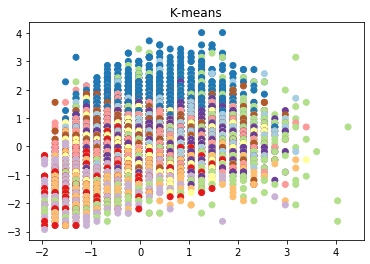

In [71]:
kmeans(predictors_scaled, 10)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

skillsPCA_labels = kmeans.fit_predict(skillsPCA)
In [12]:
dfskillsPCA = pd.DataFrame(skillsPCA)
dfskillsPCA['cluster'] = skillsPCA_labels

#Clustering 1A: Visualize clustering-1 using TSNE (5D > 2D)
#The TSNE here is created from the 5D PCA components. In contrast, later on we will create the TSNE that is based on the original 34 variables. We will see later that the visualized 2D scatter doesn't look to different. However, the computational time required for TSNE from original vector space is much longer

#In [13]:


In [139]:
#Value binning based on 5 quantile groups
y_binned_quantile = pd.qcut(target_val,5, labels=[1,2,3,4,5])

In [141]:
from sklearn.manifold import TSNE

scaled = StandardScaler()
X = scaled.fit_transform(predictors_df)

Xtsne = TSNE(n_components=2).fit_transform(X)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = y_binned_quantile
dftsne.columns = ['x1','x2','cluster']



### Visualizing TSNE with points colored by Value bins (y_binned_quantile)

Text(0.5, 1.0, 'TSNE Reduction Colored by Value Bin')

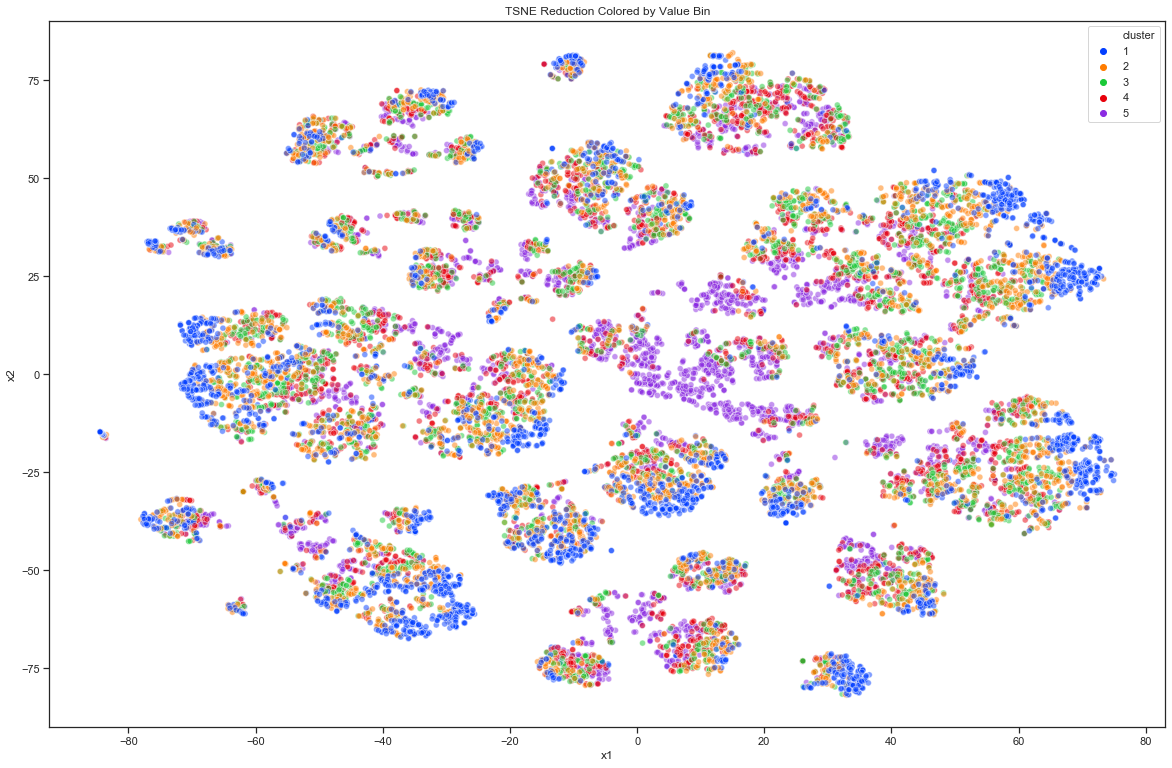

In [164]:
fig, ax = plt.subplots(figsize=(20,13))

cmap = sns.color_palette("bright", 5)
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,palette=cmap ,ax=ax)
ax.set_title('TSNE Reduction Colored by Value Bin')



### Let's try coloring TSNE using position group

In [154]:
dftsne['Position_Group_Labels'] = fifa.Position_Group

Text(0.5, 1.0, 'TSNE Reduction Colored by Position Group')

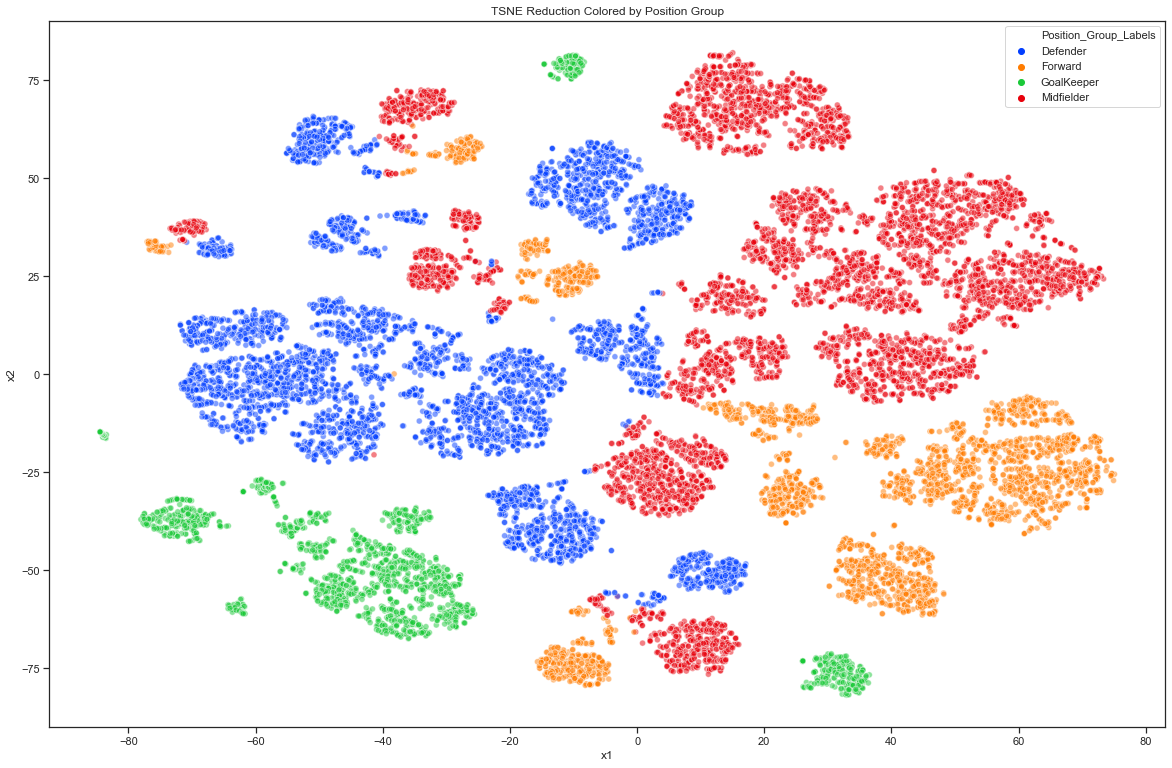

In [163]:
fig, ax = plt.subplots(figsize=(20,13))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='Position_Group_Labels',legend="full",alpha=0.5,ax=ax)
ax.set_title('TSNE Reduction Colored by Position Group')


### Try by Continent

Text(0.5, 1.0, 'TSNE Reduction Colored by Continent')

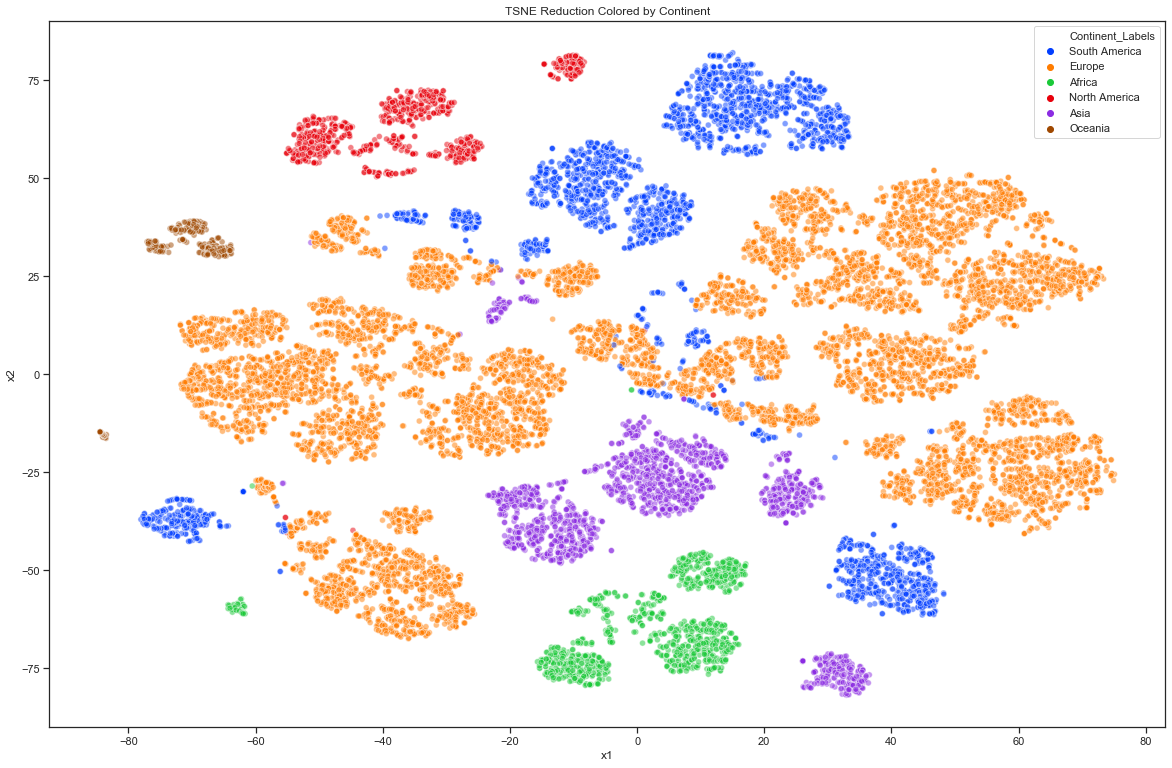

In [170]:
dftsne['Continent_Labels'] = fifa.Continent

fig, ax = plt.subplots(figsize=(20,13))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='Continent_Labels',legend="full",alpha=0.5,ax=ax)
ax.set_title('TSNE Reduction Colored by Continent')

In [0]:
numeric_fifa = fifa[['Age', 'Overall', 'Potential',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                 'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys']]

#Limit to only popular clubs (reputation over 45)
numeric_fifa = numeric_fifa[fifa['Club_Reputation'] > 45]

#numeric_fifa.groupby(fifa['Club']).sum().sort_values(by = 'Overall', ascending = False)

numeric_fifa_byclub = numeric_fifa.groupby(fifa['Club']).sum()

#Drop limited NA rows
numeric_fifa_byclub.dropna(axis = 'rows', inplace = True)

#Get Values
numeric_values = numeric_fifa_byclub.values

#Get Labels for dendogram
club_labels = fifa.Club[fifa['Club_Reputation'] > 45].values


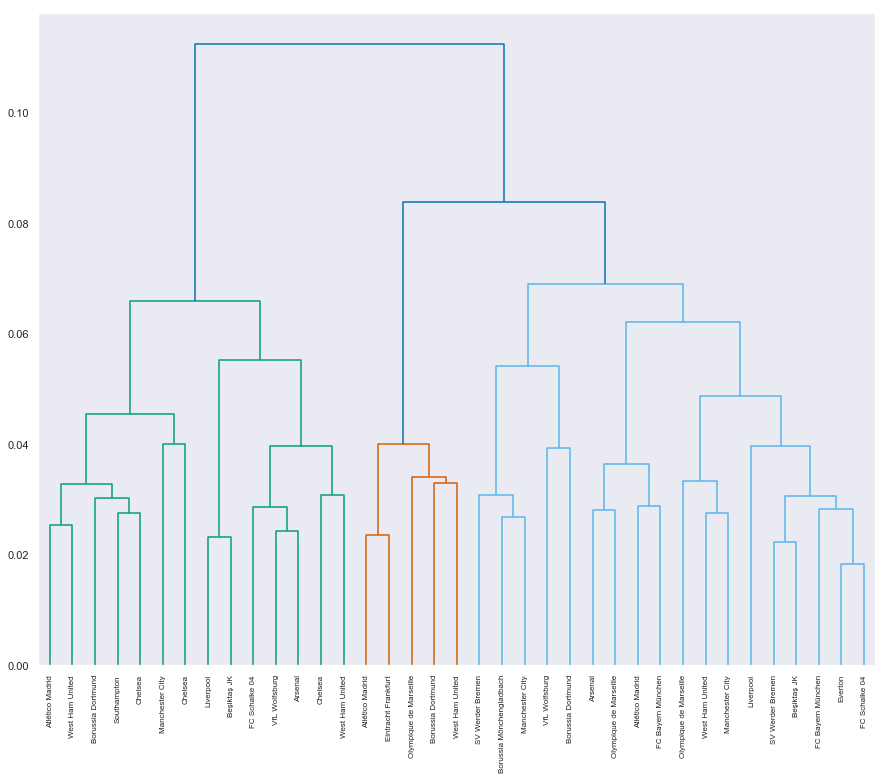

In [0]:
# Any Pre-processing needed?
normalized_numeric = normalize(numeric_values)
plt.figure(figsize=(15,12))

# Calculate the linkage: mergings
mergings = linkage(normalized_numeric, method= 'ward')

# Plot the dendrogram
dendrogram(
    mergings,
    labels=club_labels,
    leaf_rotation=90.,
    leaf_font_size=8)


plt.show()

In [0]:
fifa.loc[:,['Club','International Reputation']].groupby('Club').sum().sort_values(by ='International Reputation',  ascending = False)

International Reputation
Club                                                   
FC Barcelona                                       74.0
FC Bayern München                                  73.0
Chelsea                                            70.0
Manchester United                                  69.0
Manchester City                                    69.0
Real Madrid                                        69.0
Arsenal                                            67.0
Paris Saint-Germain                                67.0
Borussia Dortmund                                  66.0
Tottenham Hotspur                                  66.0
Liverpool                                          65.0
Juventus                                           63.0
Atlético Madrid                                    62.0
Milan                                              57.0
West Ham United                                    57.0
Napoli                                             54.0
FC Porto                                           53.0
Fenerbahçe SK                                      52.0
Roma                                               52.0
Inter                                              52.0
Beşiktaş JK                                        51.0
Lazio                                              51.0
Everton                                            51.0
Villarreal CF                                      50.0
AS Monaco                                          50.0
Sevilla FC                                         49.0
Valencia CF                                        48.0
Olympique de Marseille                             48.0
Borussia Mönchengladbach                           47.0
VfL Wolfsburg                                      47.0
Eintracht Frankfurt                                46.0
Ajax                                               46.0
FC Schalke 04                                      46.0
SV Werder Bremen                                   46.0
Leicester City                                     46.0
Sporting CP                                        46.0
Southampton                                        46.0
TSG 1899 Hoffenheim                                45.0
Stoke City                                         45.0
Crystal Palace                                     45.0
Wolverhampton Wanderers                            44.0
SL Benfica                                         44.0
Athletic Club de Bilbao                            44.0
Hertha BSC                                         43.0
Bayer 04 Leverkusen                                43.0
Medipol Başakşehir FK                              42.0
FC Augsburg                                        42.0
Galatasaray SK                                     42.0
Olympique Lyonnais                                 42.0
Newcastle United                                   41.0
...                                                 ...
VfR Aalen                                          24.0
Hobro IK                                           24.0
Śląsk Wrocław                                      24.0
Sandefjord Fotball                                 24.0
Os Belenenses                                      24.0
Oldham Athletic                                    24.0
Crawley Town                                       24.0
Ranheim Fotball                                    24.0
Cheltenham Town                                    24.0
Lillestrøm SK                                      24.0
SG Sonnenhof Großaspach                            24.0
Forest Green Rovers                                24.0
Carlisle United                                    24.0
SV Wehen Wiesbaden                                 24.0
La Berrichonne de Châteauroux                      24.0
IK Start                                           24.0
Strømsgodset IF                                    24.0
IFK Norrköping                                     24.0
GIF Sundsvall                                      23.0

# APPENDIX

## Defining an Undervalued Player

In [0]:
#Average time player stays at a team
#avg_stay = (fifa.Joined.mean()/365)*12
#avg_stay

23.415377860859216

In [0]:
#scaled = StandardScaler()

#Average Overall/Potential

#scaled_avg_overpot = scaled.fit_transform(np.array(avg_over_pot).reshape(-1,1))

#Scale Wage & Value
#scaled_wage = scaled.fit_transform(np.array(fifa.Wage).reshape(-1,1))
#scaled_value = scaled.fit_transform(np.array(fifa.Value).reshape(-1,1))

#Average of scaled
#scaled_avg_wagevalue = (scaled_wage+scaled_value)/2


#undervalued_score = scaled_avg_overpot/scaled_avg_wagevalue


#avg_over_pot = (fifa.Overall+fifa.Potential)/2

#avg_value_age = (fifa.Value+(fifa.Wage*avg_stay))/2

#undervalued_score = avg_over_pot/avg_value_age

#maxx = undervalued_score[undervalued_score != np.inf].max()
#undervalued_score.replace(np.inf,maxx,inplace=True)

#undervalued_score_scaled = scaled.fit_transform(np.array(undervalued_score).reshape(-1,1))

In [0]:
#fifa['undervalued_score'] = undervalued_score_scaled

In [0]:
#fifa.sort_values(by = 'undervalued_score', ascending = True).head()

ID          Name  Age Nationality  Overall  Potential  \
2    2     Neymar Jr   26      Brazil       92         93   
0    0      L. Messi   31   Argentina       94         94   
4    4  K. De Bruyne   27     Belgium       91         92   
5    5     E. Hazard   27     Belgium       91         91   
15  15     P. Dybala   24   Argentina       89         94   

                   Club        Value      Wage  Special  Preferred Foot  \
2   Paris Saint-Germain  118500000.0  290000.0     2143               1   
0          FC Barcelona  110500000.0  565000.0     2202               0   
4       Manchester City  102000000.0  355000.0     2281               1   
5               Chelsea   93000000.0  340000.0     2142               1   
15             Juventus   89000000.0  205000.0     2092               0   

    International Reputation  Weak Foot  Skill Moves Body Type  Real Face  \
2                        5.0        5.0          5.0      Lean          1   
0                        5.0        4.0          4.0      Lean          1   
4                        4.0        5.0          4.0    Normal          1   
5                        4.0        4.0          4.0    Normal          1   
15                       3.0        3.0          4.0    Normal          1   

   Position  Jersey Number  Joined  Loaned From  Contract Valid Until  Height  \
2        LW           10.0     516            0                     4     175   
0        RF           10.0    5297            0                     3     170   
4       RCM            7.0    1220            0                     5     180   
5        LF           10.0    2375            0                     2     173   
15       LF           21.0    1280            0                     4     178   

    Weight  LS  ST  RS  LW  LF  CF  RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  \
2      150  84  84  84  89  89  89  89  89   89   89   89  88   81  81   81   
0      159  88  88  88  92  93  93  93  92   93   93   93  91   84  84   84   
4      154  82  82  82  87  87  87  87  87   88   88   88  88   87  87   87   
5      163  83  83  83  89  88  88  88  89   89   89   89  89   82  82   82   
15     165  83  83  83  87  86  86  86  87   87   87   87  86   79  79   79   

    RM  LWB  LDM  CDM  RDM  RWB  LB  LCB  CB  RCB  RB  Crossing  Finishing  \
2   88   65   60   60   60   65  60   47  47   47  60      79.0       87.0   
0   91   64   61   61   61   64  59   47  47   47  59      84.0       95.0   
4   88   77   77   77   77   77  73   66  66   66  73      93.0       82.0   
5   89   66   63   63   63   66  60   49  49   49  60      81.0       84.0   
15  86   62   58   58   58   62  56   45  45   45  56      82.0       84.0   

    HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  \
2              62.0          84.0     84.0       96.0   88.0        87.0   
0              70.0          90.0     86.0       97.0   93.0        94.0   
4              55.0          92.0     82.0       86.0   85.0        83.0   
5              61.0          89.0     80.0       95.0   83.0        79.0   
15             68.0          87.0     88.0       92.0   88.0        88.0   

    LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  \
2          78.0         95.0          94.0         90.0     96.0       94.0   
0          87.0         96.0          91.0         86.0     91.0       95.0   
4          91.0         91.0          78.0         76.0     79.0       91.0   
5          83.0         94.0          94.0         88.0     95.0       90.0   
15         75.0         92.0          87.0         83.0     91.0       86.0   

    Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  \
2      84.0       80.0     61.0     81.0      49.0       82.0        56.0   
0      95.0       85.0     68.0     72.0      59.0       94.0        48.0   
4      77.0       91.0     63.0     90.0      75.0       91.0        76.0   
5      94.0       82.0     56.0     83.0      66.0  

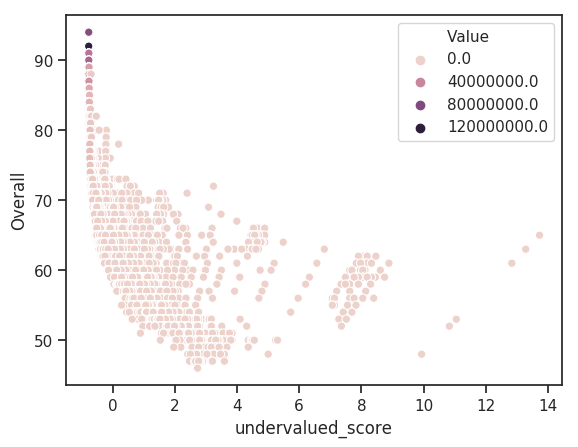

In [0]:
#sns.scatterplot(x ='undervalued_score', y = 'Overall', hue = 'Value', data = fifa)

In [ ]:
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#position_group_labels = le.fit_transform(fifa.Position_Group)
#